# ARIMA and Stationarity

## ARIMA Overview
* performs very will when working iwth a time series where the data is directly realated to the time stamp
* where there is clear growth and seasonality based over 
* does NOT take into account any outside factors if those affects was not already present in the current data
* just becasue you have a dataset with timestamps, does not mean that the ARIMA model can succesfully forecast future data point for other future time points
<br>
ARIMA model is a generalization of hte ARMA model<br>
Both ARIMA and ARMA models can be used for fitting to time series data either to:
* better understand the data
* predict future points in the series (forecasting)
<br>
"Integrated" part of the model - is the differencing step that added to data that shows non-stationarity where the "integrated" part of the model can be applied one or more times to eleminate the non-stationarity



### Non-Seasonal ARIMA
Generally noted as ARIMA(p, d, q), where p, d and q are non-negatie numbers <br>

AR (p) Autoregression:
* regression model taht utilizes the dependent relationship between a curent observation and observations over a previous period
<br>
I (d) Integrated:
* Differencing of observations (substracting an observation from an observation at the previous time step) in order to make the time series stationary
<br>
MA (q) Moving Average:
* A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations


## Stationairty
* A Stationary series has constant mean and variance over time
* Stationary dataset allows to predict the mean and variance will be the same in future periods
* Covariance should also not be a function of time

**Mathematical test for stationarity in the data** - Dickey-Fuller test
* If found to be non-stationary, the dataset has be transformed to be stationary
* Each differencing step comes at the cost of loosing a row of data
* Data can be differenced by a season - monthly data with yearly seasonality can be differenced by a time unit of 12, instead of 1
* A common technique with seasonal ARIMA models is to combine both, taking the seasonal difference of the first difference

## Choosing the p, d and q terms
* Method 1 - using the ACF and PACF to manually pick the values
* Method 2 - Grid Search: Run ARIMA based models on different components of p, d and q and compare the models against some evaluation metric

## ATIMA Vs SARIMA
* ARIMA - p, d and q
* SARIMA - adds another set of parameters P, D and Q for the seasonal component

# Break Down of ARIMA

## 1. Autoregression (AR) - p
Specifies that the output variable deends linearly on its own previous values and on a stochastic term (an imperfectly predictable term - a noise term) <br>
Add MA to AR to get ARMA model<br>
Add I to ARMA to get ARIMA<br>
* describes a regression of the variable against itself
* Autoregression is run against a set of lagged values of order p

There are many orders of AR. 
* AR(1) - using y(t) using 1 lag step backwords y(t-1)
* AR(2) - uses y(t-1) and y(t-2)

**StatsModels can help decide what order of a AR model is best**


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
from statsmodels.tsa.ar_model import AutoReg, ARResults


In [101]:
df = pd.read_csv('/Users/tanojudawattage/1_tanoj/0.00_Cloud_Computing_and_Streaming_Tech/Python_for_Time_Series_Files_JosePortilla/Data/uspopulation.csv', 
                 parse_dates=True, 
                 index_col='DATE')

In [102]:
# set the index frequency
df.index.freq = 'MS'  # Set the frequency to Month Start

In [103]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


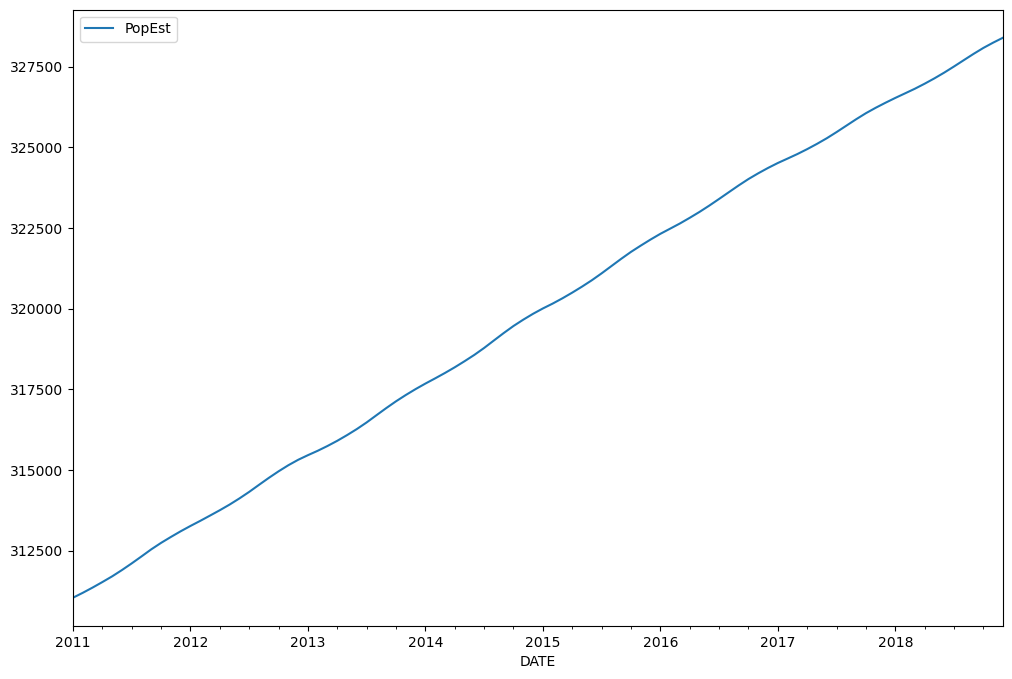

In [104]:
df.plot(figsize=(12,8))
plt.show()

In [105]:
# check the length of the data for training and testing
len(df)

96

In [106]:
# split train and test by months - last 12 months for testing
96-12 

84

In [107]:
#set train and test sets
train = df.iloc[:84]
test = df.iloc[84:]

In [108]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### AR Order 1 Predictions

In [109]:
# train the model on the training set
model = AutoReg(train['PopEst'], lags=1)  # create the model object - simple AR(1) model
AR1fit = model.fit()

In [110]:
# check the order of k lags used
model._lags

[1]

In [111]:
# check the constant and coefficient values
AR1fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

### General Format for Obtaining Predictions

In [112]:
# set the start and end points of the dataset
start = len(train)
end = len(train) + len(test) - 1

In [113]:
start

84

In [114]:
end

95

In [115]:
# calcuate predictions for the test set
AR1fit.predict(start=start, end=end, dynamic=False)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [116]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [117]:
# compare predictions to actual values
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False)

In [118]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [119]:
# rename predictions series
predictions1 = predictions1.rename('AR(1) Predictions')

In [120]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

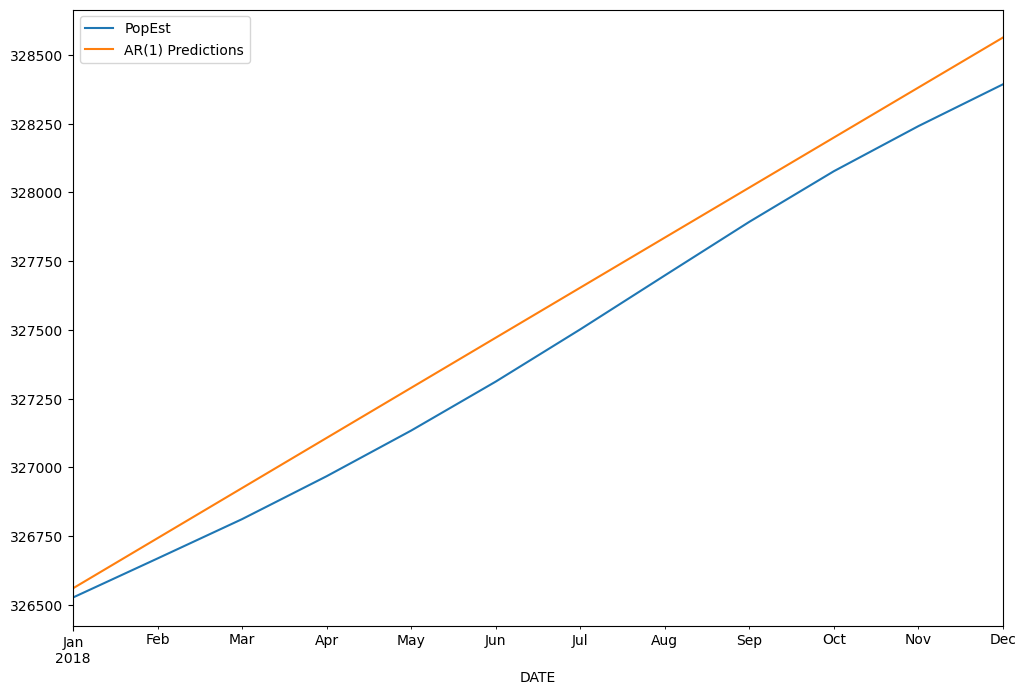

In [121]:
# plot the test set
test.plot(figsize=(12,8), legend=True)
# plot the predictions
predictions1.plot(legend=True)
plt.show()

### AR Order 2 Predictions

In [122]:
# train the model on the training set for AR order 2
model = AutoReg(train['PopEst'], lags=2)  # create the model object - simple AR(2) model
AR2fit = model.fit()

In [123]:
AR2fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [124]:
# calculate predictions for AR(2) model
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False)
predictions2 = predictions2.rename('AR(2) Predictions')

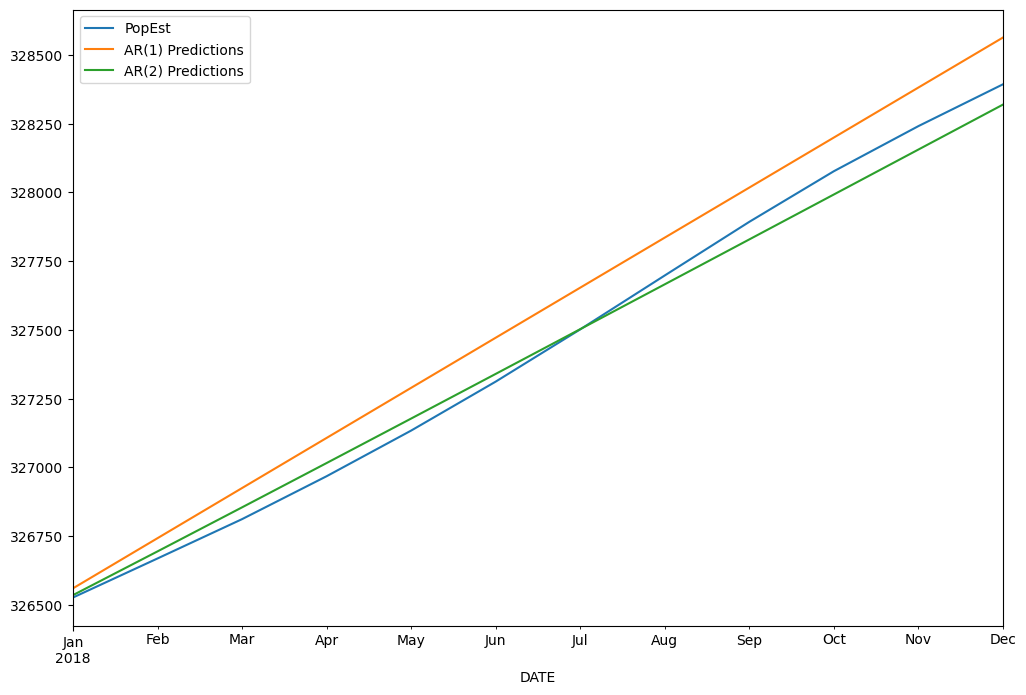

In [125]:
# plot all three predictions against the actual values
test['PopEst'].plot(figsize=(12,8), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
plt.show()

### Finding the best order vale

In [164]:
model = ar_select_order(train['PopEst'], maxlag=10, ic='bic') # select the best lag order based on BIC
ARfit = model.model.fit()

In [165]:
ARfit.params

const        82.309677
PopEst.L1     2.437997
PopEst.L2    -2.302100
PopEst.L3     1.565427
PopEst.L4    -1.431211
PopEst.L5     1.125022
PopEst.L6    -0.919494
PopEst.L7     0.963694
PopEst.L8    -0.439511
dtype: float64

In [166]:
# predictions based on the best model
predictionsBIC = ARfit.predict(start=start, end=end, dynamic=False)
predictionsBIC = predictionsBIC.rename('AR(BIC) Predictions')
#predictionsBIC = ARfit.predict(start=start, end=end, dynamic=False)
#preds = [predictions1, predictions2, predictionsBIC]

In [167]:
# evaluate the metrics using mean squared error
from sklearn.metrics import mean_squared_error

In [170]:
# labels for the different prediction series
labels = ['AR(1) Predictions', 'AR(2) Predictions', 'AR(BIC8) Predictions']
preds = [predictions1, predictions2, predictionsBIC]

In [171]:
# compare each of the prediction values using a for loop
for i in range(3):
    # np.sqrt() to calculate root mean squared error
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'Mean Squared Error for {labels[i]}: {error}') 

Mean Squared Error for AR(1) Predictions: 17449.714239687182
Mean Squared Error for AR(2) Predictions: 2713.2586305658756
Mean Squared Error for AR(BIC8) Predictions: 186.9693508696605


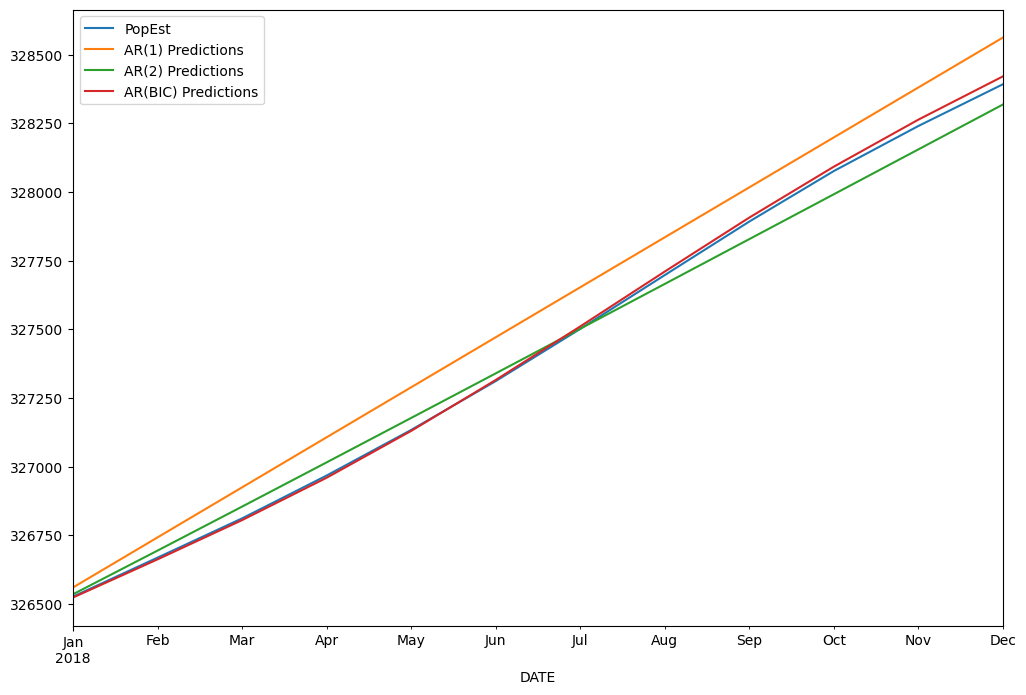

In [172]:
# plot all three predictions
test['PopEst'].plot(figsize=(12,8), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictionsBIC.plot(legend=True)
plt.show()

Intersting to note that prediction accuary of looking back 8 months to predict the 9 month of child births

# Frecasting on Future Data
* you should only be forecasting into the future for a maximum period equal to the TEST set - i.e. max forecasting length should not be longer than the lengths of the TEST set.

In [ ]:
# retrain the best model on the full dataset
model = AutoReg(df['PopEst'], lags=8)
ARfit = model.fit()

In [178]:
# predict 12 months into the future
forecasted_values = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False)
predictions_future = forecasted_values.rename('AR(BIC8) Future Predictions').rename('Forecast')

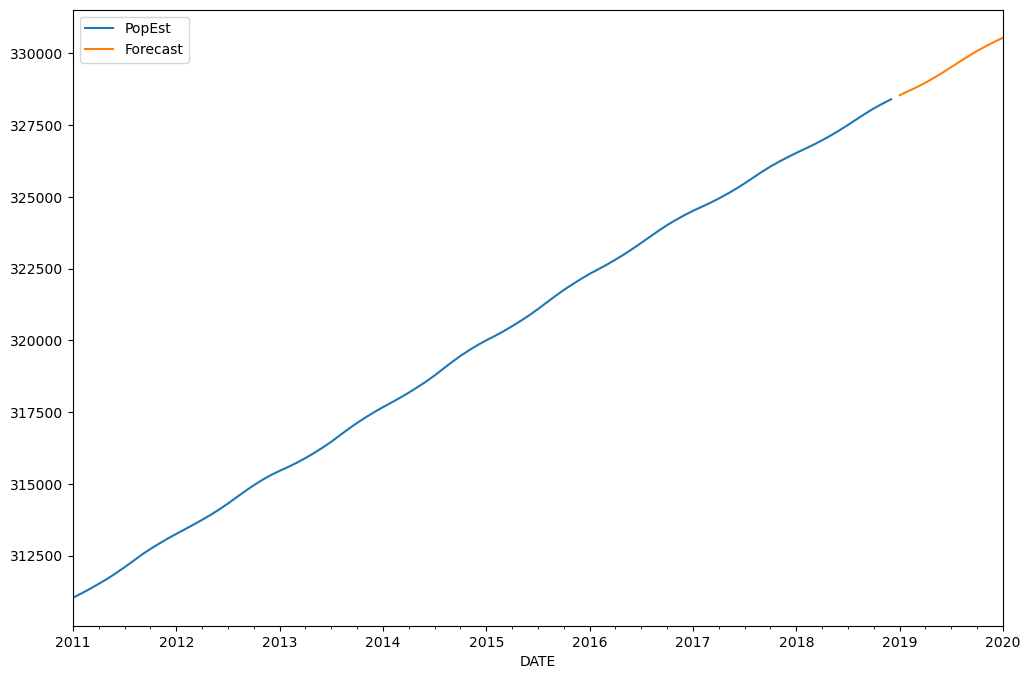

In [ ]:
# plot the future predictions
df['PopEst'].plot(figsize=(12,8), legend=True)
predictions_future.plot(legend=True)
plt.show()